# GOURMET GUIDE

### Foundation Project 1: Food Recommendation Model

#### Group 6

* Charanjeet Singh - 12220064
* Pooja Nilesh Doshi - 12220028
* Snigdha Debashis Bhattacharjee - 12220067
* Vinayak Dave - 12220047

In [1]:
#!pip install threadpoolctl==3.1.0
#!pip install yellowbrick
#!pip install pca
#!pip install spacy==3.5.2
#!python -m spacy download en

In [2]:
import json
import string
import spacy
import matplotlib as m
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import os
import re
import pandas as pd
from pandas import DataFrame
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import threadpoolctl
import warnings
warnings.filterwarnings("ignore")
from pca import pca
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import linear_kernel

In [3]:
df = pd.read_excel(r"C:\Users\Green Lantern\OneDrive\Documents\ISB AMPBA Winter 2023\Term 2\Foundational Project 1\FP1_Project 4_Group6_Final\restaurant dataset\zomato1.xlsx")

In [4]:
df.head()

,Unnamed: 0,rest_id,url,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list
0,0,1,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,1,2,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,2,3,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,3,4,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,4,5,https://www.zomato.com/bangalore/grand-village...,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23259 entries, 0 to 23258
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    23259 non-null  int64  
 1   rest_id       23259 non-null  int64  
 2   url           23259 non-null  object 
 3   name          23259 non-null  object 
 4   online_order  23259 non-null  bool   
 5   book_table    23259 non-null  bool   
 6   rate          23259 non-null  float64
 7   votes         23259 non-null  int64  
 8   location      23259 non-null  object 
 9   rest_type     23259 non-null  object 
 10  dish_liked    23259 non-null  object 
 11  cuisines      23259 non-null  object 
 12  cost          23259 non-null  float64
 13  reviews_list  23259 non-null  object 
dtypes: bool(2), float64(2), int64(3), object(7)
memory usage: 2.2+ MB


#### EXPLORATORY DATA ANALYSIS

In [6]:
#Calculating total number of restaurants in our dataset
total_restaurants = len(df)
total_restaurants

23259

Text(0.5, 0, 'Number of Outlets')

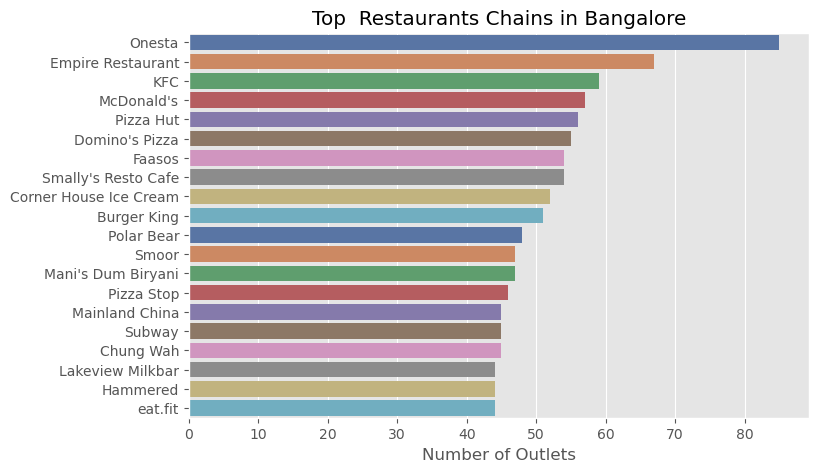

In [7]:
#Which are the top restaurant chains in Bangalore?
plt.figure(figsize=(8,5))
rest_chains = df['name'].value_counts()[:20]
sns.barplot(x = rest_chains,y = rest_chains.index ,palette = 'deep')
plt.title("Top  Restaurants Chains in Bangalore")
plt.xlabel("Number of Outlets")

Text(0.5, 0, 'count')

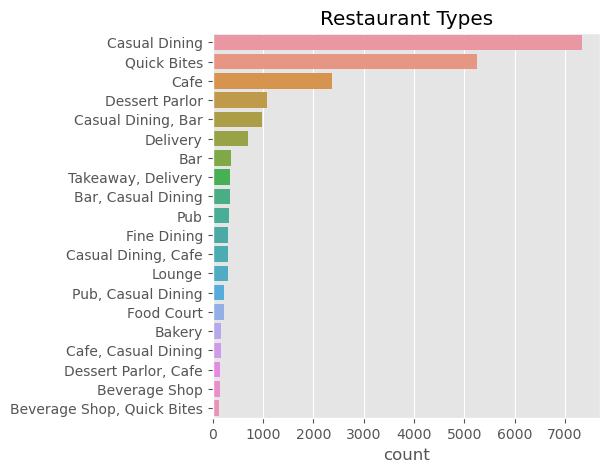

In [8]:
#Which are the most common types of restaurants in Bangalore?
plt.figure(figsize=(5,5))
rest=df['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant Types")
plt.xlabel("count")

Text(0.5, 1.0, 'Most Popular Cuisines of Bangalore')

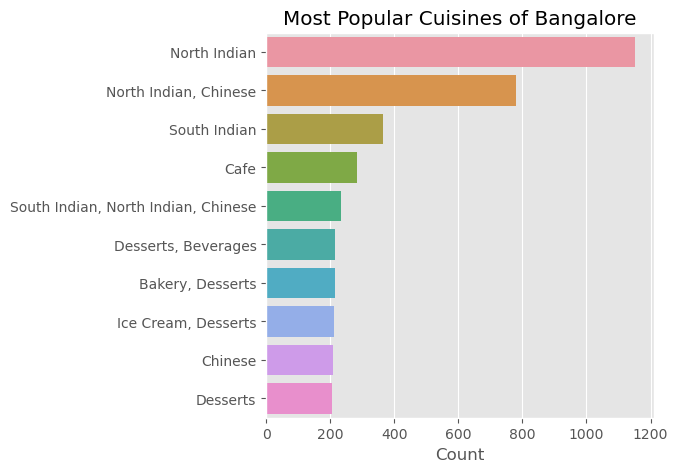

In [9]:
#Most popular cuisines liked by Bangaloreans
plt.figure(figsize=(5,5))
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most Popular Cuisines of Bangalore")

<AxesSubplot:xlabel='location'>

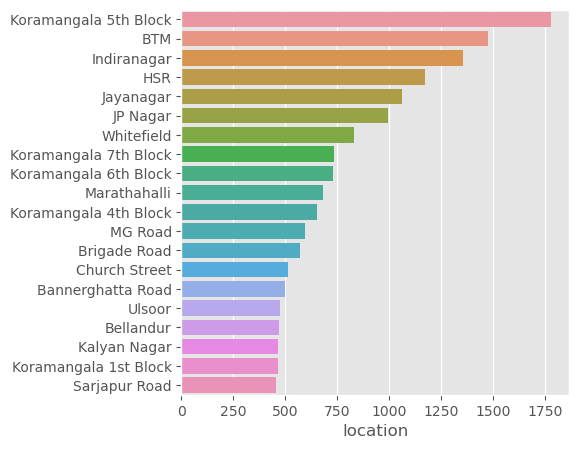

In [10]:
#Locations with most number of restaurants
plt.figure(figsize=(5,5))
Rest_locations=df['location'].value_counts()[:20]
sns.barplot(Rest_locations,Rest_locations.index)

<AxesSubplot:xlabel='rate', ylabel='Density'>

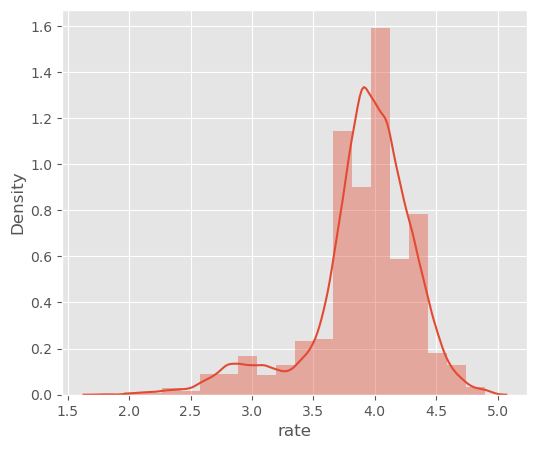

In [11]:
#Rating Distribution
plt.figure(figsize=(6,5))
rating=df['rate']
sns.distplot(rating,bins=20)

In [12]:
#Define the rating ranges
rating_ranges = [(0, 2.9), (3, 3.9), (4, 4.5), (4.5, 5)]

#Calculating the percentage of restaurants in each rating range
ratings_counts = []
for rating_range in rating_ranges:
    lower_bound, upper_bound = rating_range
    count = len(df[(df['rate'].astype(float) >= lower_bound) & (df['rate'].astype(float) <= upper_bound)])
    percentage = (count / total_restaurants) * 100
    ratings_counts.append((lower_bound, upper_bound, count, percentage))

#Printing the results    
for rating_count in ratings_counts:
    lower_bound, upper_bound, count, percentage = rating_count
    print(f"Rating {lower_bound}-{upper_bound}: {count} restaurants ({percentage:.2f}% of total)")

Rating 0-2.9: 1184 restaurants (5.09% of total)
Rating 3-3.9: 10158 restaurants (43.67% of total)
Rating 4-4.5: 11329 restaurants (48.71% of total)
Rating 4.5-5: 1236 restaurants (5.31% of total)


In [13]:
#Generating summary statistics of the cost variable
cost_stats = df['cost'].describe()
print(cost_stats)

count    23259.000000
mean       379.959966
std        280.080196
min          1.000000
25%          3.000000
50%        400.000000
75%        600.000000
max        950.000000
Name: cost, dtype: float64


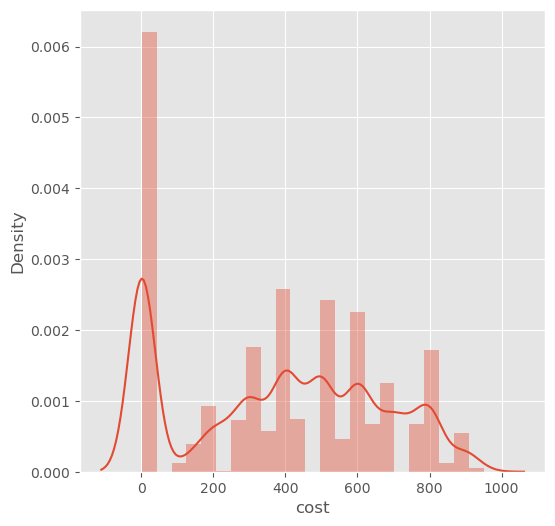

In [14]:
#Distribution of cost for two people
plt.figure(figsize=(6,6))
sns.distplot(df['cost'])
plt.show()

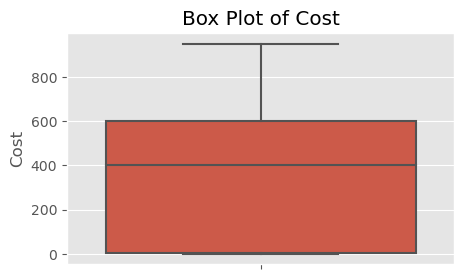

In [15]:
#Plotting a box plot of the cost variable
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, y='cost')
plt.title('Box Plot of Cost')
plt.ylabel('Cost')
plt.show()

In [16]:
#Converting 'cost' column to numeric type
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

#Defining the cost ranges
ranges = [(0, 200), (200, 500), (500, 800), (800, 1000), (1000, float('inf'))]

#Initializing counts and percentages for each range
counts = [0] * len(ranges)
percentages = [0] * len(ranges)

#Counting restaurants in each range
for i, (lower, upper) in enumerate(ranges):
    count = len(df[(df['cost'] >= lower) & (df['cost'] < upper)])
    percentage = (count / total_restaurants) * 100
    counts[i] = count
    percentages[i] = percentage
    print(f"Restaurants with cost between Rs.{lower} and Rs.{upper}: {count} ({percentage:.3f}% of total)")

#Printing the total count and percentage for all ranges
total_count = sum(counts)
total_percentage = sum(percentages)
print(f"\nTotal Restaurants: {total_count} ({total_percentage:.3f}% of total)")

Restaurants with cost between Rs.0 and Rs.200: 6470 (27.817% of total)
Restaurants with cost between Rs.200 and Rs.500: 7022 (30.190% of total)
Restaurants with cost between Rs.500 and Rs.800: 7427 (31.932% of total)
Restaurants with cost between Rs.800 and Rs.1000: 2340 (10.061% of total)
Restaurants with cost between Rs.1000 and Rs.inf: 0 (0.000% of total)

Total Restaurants: 23259 (100.000% of total)


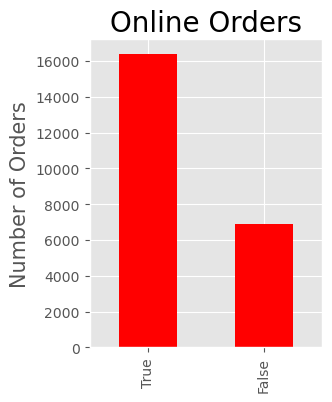

In [17]:
#Is there a relation between online order option and rating of the restaurant?
plt.rcParams['figure.figsize'] = (3, 4)

df['online_order'].value_counts().plot.bar(color = 'red')
plt.title('Online Orders', fontsize = 20)
plt.ylabel('Number of Orders', fontsize = 15)
plt.show()

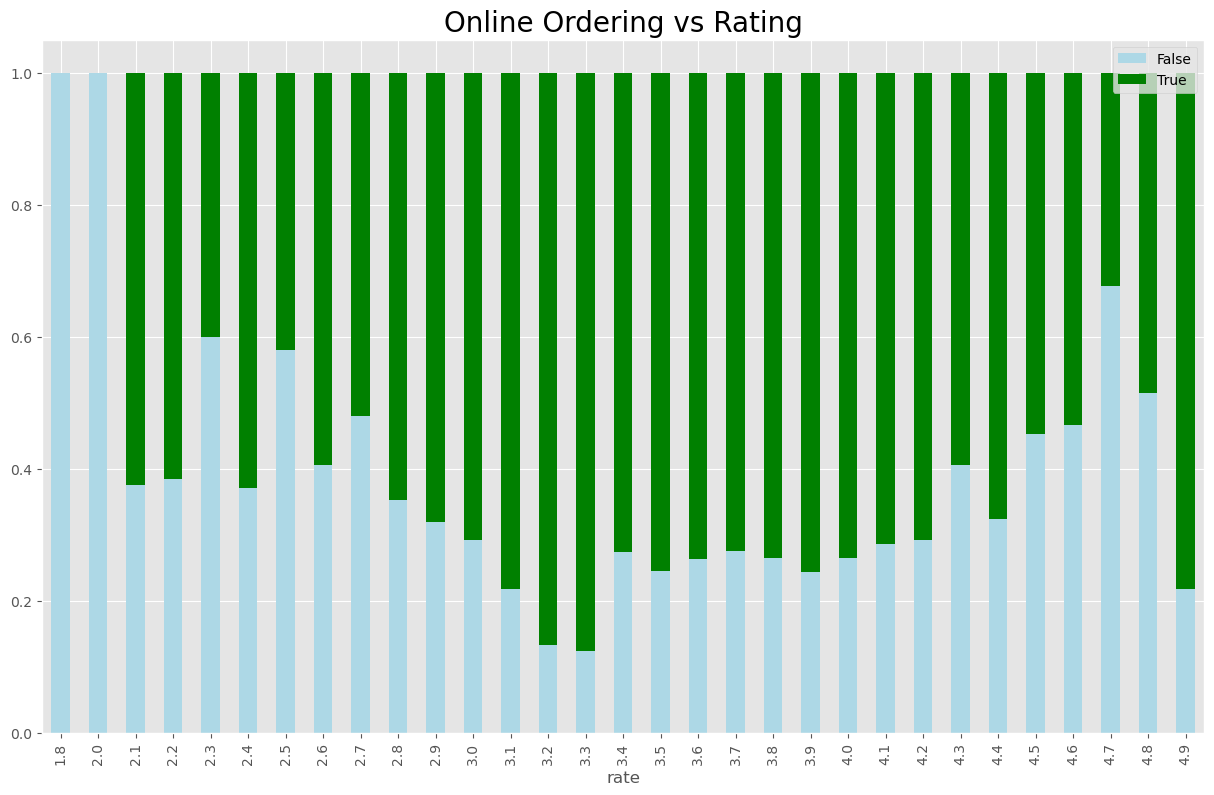

In [18]:
#Online Ordering vs Rating
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(df['rate'], df['online_order'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['lightblue','green'])
plt.title('Online Ordering vs Rating', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

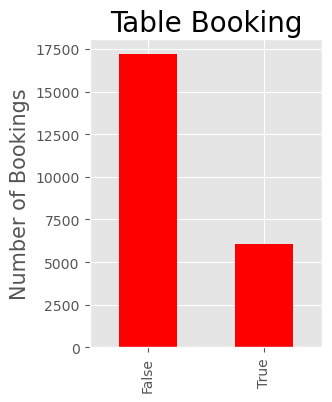

In [19]:
#Is there a relation between table booking option and rating of the restaurant?
plt.rcParams['figure.figsize'] = (3,4)

df['book_table'].value_counts().plot.bar(color = 'red')
plt.title('Table Booking', fontsize = 20)
plt.ylabel('Number of Bookings', fontsize = 15)
plt.show()

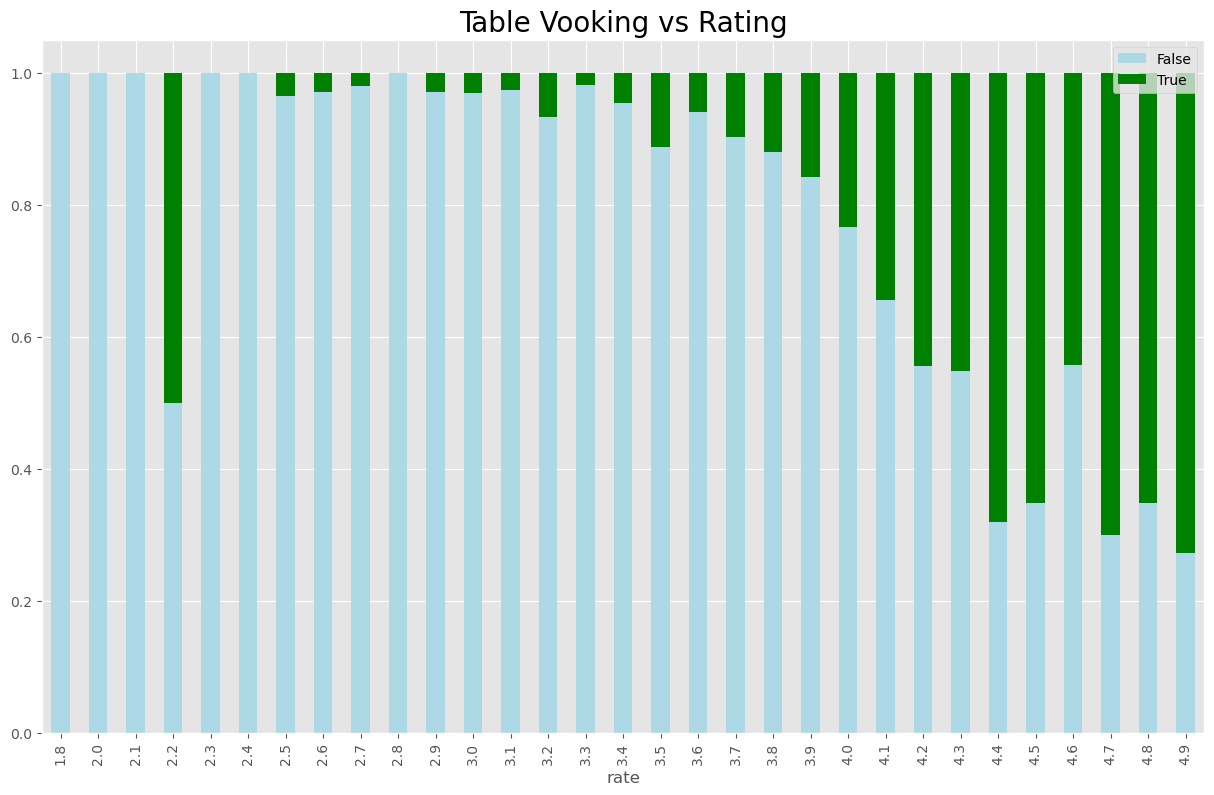

In [20]:
#Table Booking vs Rating
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(df['rate'], df['book_table'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['lightblue','green'])
plt.title('Table Vooking vs Rating', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()